In [97]:
print()

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

from sklearn.datasets import load_iris

In [99]:
x = np.array([[-1,1],[-2,-1],[-3,-2],[1,1],[2,1],[3,2]])

pca = PCA(n_components=2)
# n_components=2 >> 원하는 개수만큼 임의적으로 PC 를 추출해 냄

In [100]:
# 적합(fitting >> training)
pca.fit(x)

PCA(n_components=2)

In [101]:
x

array([[-1,  1],
       [-2, -1],
       [-3, -2],
       [ 1,  1],
       [ 2,  1],
       [ 3,  2]])

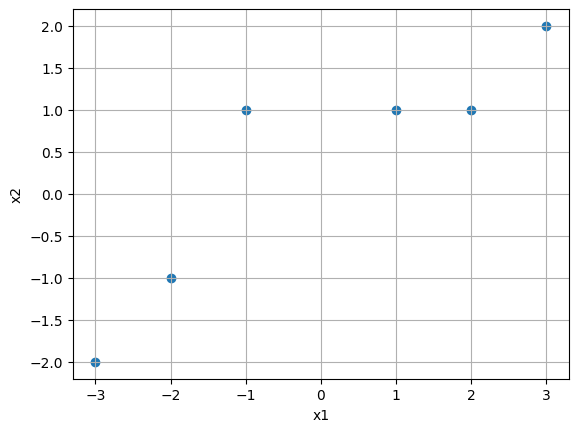

In [102]:
# feature space 에서 데이터 분포

plt.scatter(x[:, 0], x[:, 1])
plt.xlabel('x1')
plt.ylabel('x2')

plt.grid()

plt.show()

In [103]:
# 비지도 학습(pc score) >> fit_transform()
z = pca.transform(x)
z

array([[ 0.50917706,  1.08866118],
       [ 2.40151069, -0.10258752],
       [ 3.7751606 , -0.43887001],
       [-1.20075534,  0.05129376],
       [-2.05572155, -0.46738995],
       [-3.42937146, -0.13110746]])

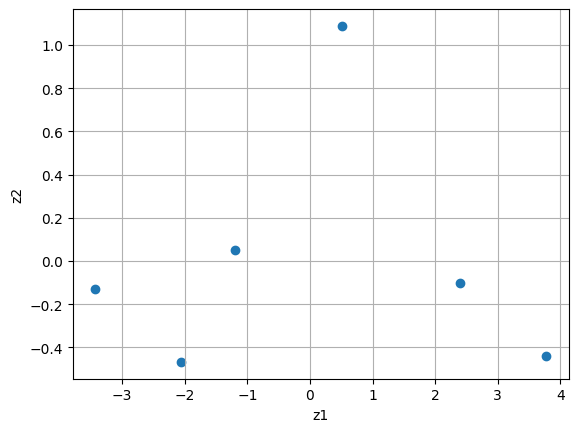

In [104]:
# feature space 에서 pca 값(변환된 데이터) 분포
plt.scatter(z[:, 0], z[:, 1])
plt.xlabel('z1')
plt.ylabel('z2')

plt.grid()

plt.show()
# z1(pc1) 이 z2(pc2) 보다 더 큰 variance 가지고 있음

In [105]:
# PC loading 벡터

phi = pca.components_
phi
# 주성분 : 데이터의 변동성(variance) 설명하는 직교 성분(pc1, pc2)
# phi 결과 >> 주성분 행렬(각 행: 각 주성분, 각 열: feature에 대한 주성분의 가중치)

array([[-0.8549662 , -0.51868371],
       [-0.51868371,  0.8549662 ]])

In [106]:
phi[0]
# 첫번째 주성분(pc1)의 가중치 벡터
# -0.8549662(첫번째 feature에 대한 가중치), -0.51868371(두번째 feature에 대한 가중치)
# >> 각 feature는 음(-)의 가중치 가짐. 첫번째 feature가 더 큰 영향을 미칩니다.


array([-0.8549662 , -0.51868371])

In [107]:
phi[1]
# 두번째 주성분(pc2)의 가중치 벡터
# -0.51868371(첫번째 feature에 대한 가중치),  0.8549662(두번째 feature에 대한 가중치)
# >> 두 번째

array([-0.51868371,  0.8549662 ])

In [108]:
# Z
np.matmul(x, phi.T)
# PCA 수행 후, 주성분으로 데이터 변환
# 원본 데이터 x >> 주성분 공간(phi)으로 투사(projection) 하여 차원을 축소
# >> 새로운 주성분 좌표를 나타냄

# 결과 해석
# [0.33628249, 1.37364991]
# >> 원본데이터 x의 첫번쨰 행 [-1, 1]값이 주성분 공간 (phi)으로 변환된 좌표

array([[ 0.33628249,  1.37364991],
       [ 2.22861612,  0.18240122],
       [ 3.60226603, -0.15388128],
       [-1.37364991,  0.33628249],
       [-2.22861612, -0.18240122],
       [-3.60226603,  0.15388128]])

In [109]:
# (***) PVE (proportion of variance explained)
# 설명된 분산 비율
pca.explained_variance_ratio_

# 첫번째 pc(pc1)가 95.86%설명, 두번째 pc(pc2) 4.1% 설명

array([0.95864607, 0.04135393])

## PCA 예제_iris data

In [110]:
iris = load_iris()

In [111]:
x_iris, y_iris = iris.data, iris.target

In [112]:
x_iris

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [113]:
y_iris

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [114]:
pca = PCA(n_components=3)

pca.fit(x_iris)

PCA(n_components=3)

In [115]:
# PC score
z = pca.fit_transform(x_iris)
# standard scale 적용됨(평균 0 분산 1)

In [116]:
z

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

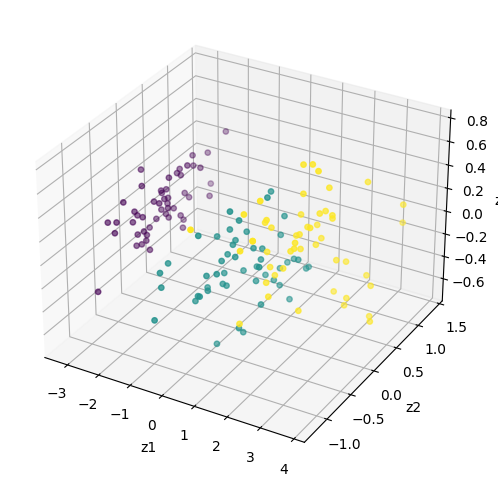

In [117]:
# PC space 에서의 데이터 분포 파악

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')

ax.scatter(z[:, 0], z[:, 1], z[:, 2], c=y_iris, s=15)
ax.set_xlabel('z1')
ax.set_ylabel('z2')
ax.set_zlabel('z3')

plt.show()

In [118]:
# pc loading vector
phi = pca.components_

In [119]:
phi

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143]])

In [120]:
phi.shape

(3, 4)

In [121]:
x_iris.shape
# 원데이터의 독립변수 (4개)

(150, 4)

In [122]:
# np.matmul(x_iris, phi.T)
np.matmul(x_iris, phi.T).shape

(150, 3)

In [123]:
np.matmul(x_iris, phi.T)[:3]

array([[ 2.81823951,  5.64634982, -0.65976754],
       [ 2.78822345,  5.14995135, -0.84231699],
       [ 2.61337456,  5.18200315, -0.61395246]])

In [124]:
# (**) 설명된 분산
pca.explained_variance_ratio_
# pc1 : 92.46% 설명 pc2 : 5.3% >> 97.7&

array([0.92461872, 0.05306648, 0.01710261])

In [125]:
# 2개의 주성분으로 97.7% 설명하네

pca = PCA(n_components=2)

z = pca.fit_transform(x_iris)
z

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

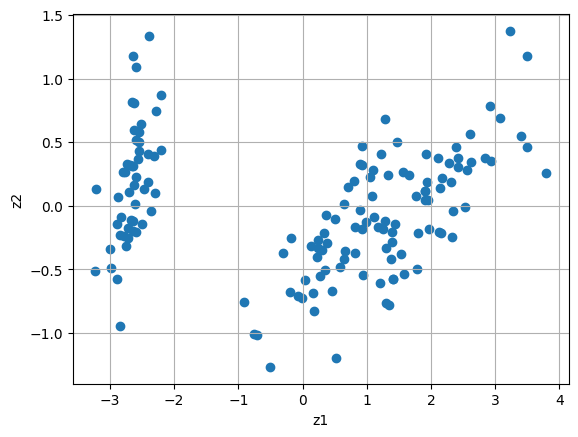

In [126]:
# feature space에서의 데이터
plt.scatter(z[:, 0], z[:, 1])
plt.xlabel('z1')
plt.ylabel('z2')
plt.grid()
plt.show()

In [127]:
z.shape

(150, 2)

In [128]:
pca.explained_variance_ratio_
# 거의 98%

array([0.92461872, 0.05306648])

## KMeans clustering 예제

In [129]:
x = np.array([[1,2],[1,4],[1,0],[10,2],[10,4],[10,0]])

## 적합 (fitting)

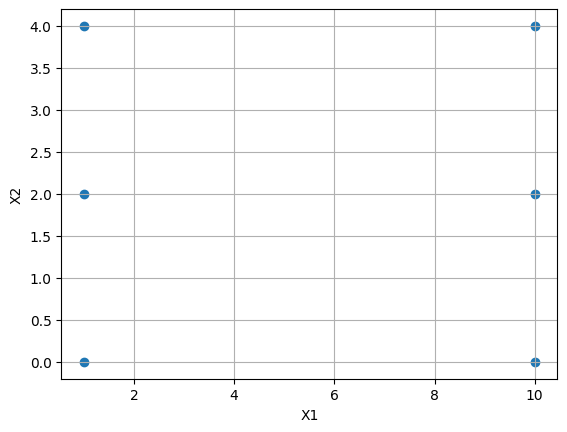

In [130]:
plt.scatter(x[:, 0], x[:, 1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()
plt.show()

In [131]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [134]:
kmeans.labels_

array([1, 1, 1, 0, 0, 0], dtype=int32)

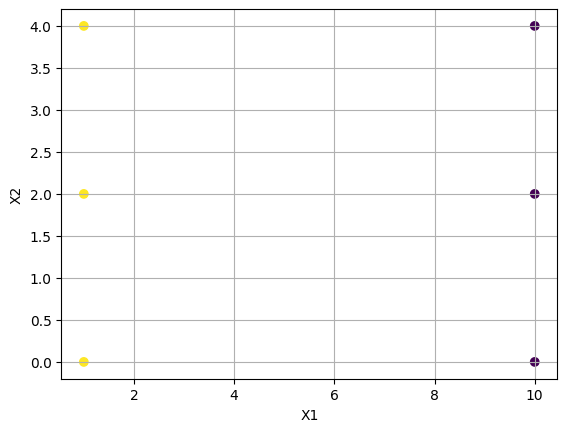

In [137]:
plt.scatter(x[:, 0], x[:, 1], c=kmeans.labels_)
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()
plt.show()

In [138]:
y_iris

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

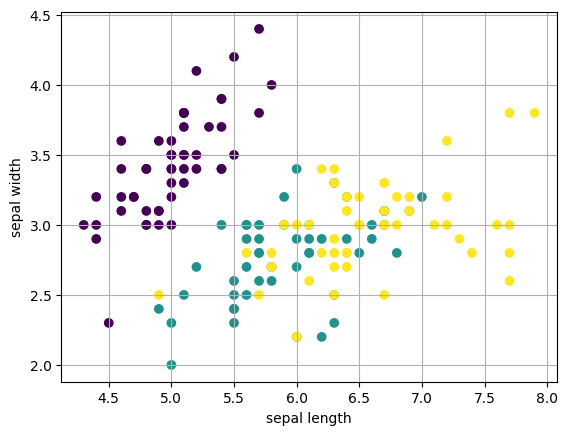

In [139]:
plt.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris)

plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.grid()
plt.show()

In [140]:
# 적합(fitting)
kmeans = KMeans(n_clusters=2, random_state= 42).fit(x_iris)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


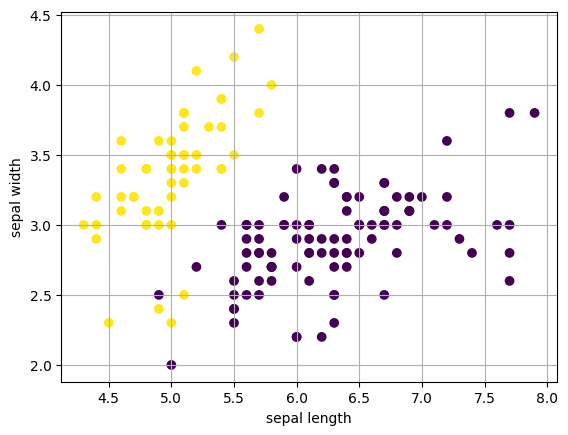

In [142]:
plt.scatter(x_iris[:, 0], x_iris[:, 1], c=kmeans.labels_)

plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.grid()
plt.show()